In [1]:
import os
import datetime
import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import cartopy.feature as cfeature
import matplotlib.path as mpath

import pydarn

# from hamsci_psws import geopack
%matplotlib inline

Re = 6371 # Radius of the Earth in km


IMPORTANT: Please make sure to cite pyDARN in publications that use plots created by pyDARN using DOI: https://zenodo.org/record/3727269. Citing information for SuperDARN data is found at https://pydarn.readthedocs.io/en/master/user/citing/


resetting environment variable IGRF_COEFFS in python script
resetting environment variable AACGM_v2_DAT_PREFIX in python script
non-default coefficient files may be specified by running aacgmv2.wrapper.set_coeff_path before any other functions


In [2]:
# ref: https://scitools.org.uk/cartopy/docs/latest/gallery/lines_and_polygons/always_circular_stereo.html#sphx-glr-gallery-lines-and-polygons-always-circular-stereo-py
def add_circle_boundary(ax):
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    # https://stackoverflow.com/questions/73364801/when-using-cartopy-python-to-make-orthographic-plot-how-to-crop-the-map-set
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)

In [3]:
mlats_ticks = [-50, -60, -70, -80]

mlats_dct = {}

dt = datetime.datetime(2017,1,1)

mlons = np.arange(0,360)
for mlat in mlats_ticks:
    glats = []
    glons = []
    for mlon in mlons:
        result = pydarn.utils.coordinates.aacgmv2.convert_latlon(mlat,mlon,0,dt,'A2G')
        glats.append(result[0])
        glons.append(result[1])
        
    mlats_dct[mlat] = {'glats':glats, 'glons':glons}

In [4]:
mpl.rcParams['font.size']      = 12
mpl.rcParams['font.weight']    = 'bold'
mpl.rcParams['axes.grid']      = True
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['figure.figsize'] = np.array([15, 8])
mpl.rcParams['axes.xmargin']   = 0

In [5]:
# AGO Lat/Lons from https://s3.amazonaws.com/Antarctica/AJUS/AJUSvXXIXn5/AJUSvXXIXn5p347.pdf
stations = {}

st = stations['P1'] = {}
st['glat'] = -83.86
st['glon'] = 129.61

st = stations['P2'] = {}
st['glat'] = -85.67
st['glon'] = -46.38

st = stations['P3'] = {}
st['glat'] = -82.50
st['glon'] =  30.00

st = stations['P4'] = {}
st['glat'] = -82.01
st['glon'] =  96.76

st = stations['P5'] = {}
st['glat'] = -75.70
st['glon'] =  89.20

st = stations['P6'] = {}
st['glat'] = -74.10
st['glon'] = 128.80

st = stations['SPA'] = {}
st['glat'] = -90.0
st['glon'] =   0.0

st = stations['MCM'] = {}
st['glat'] = -77.8500
st['glon'] = 166.6667

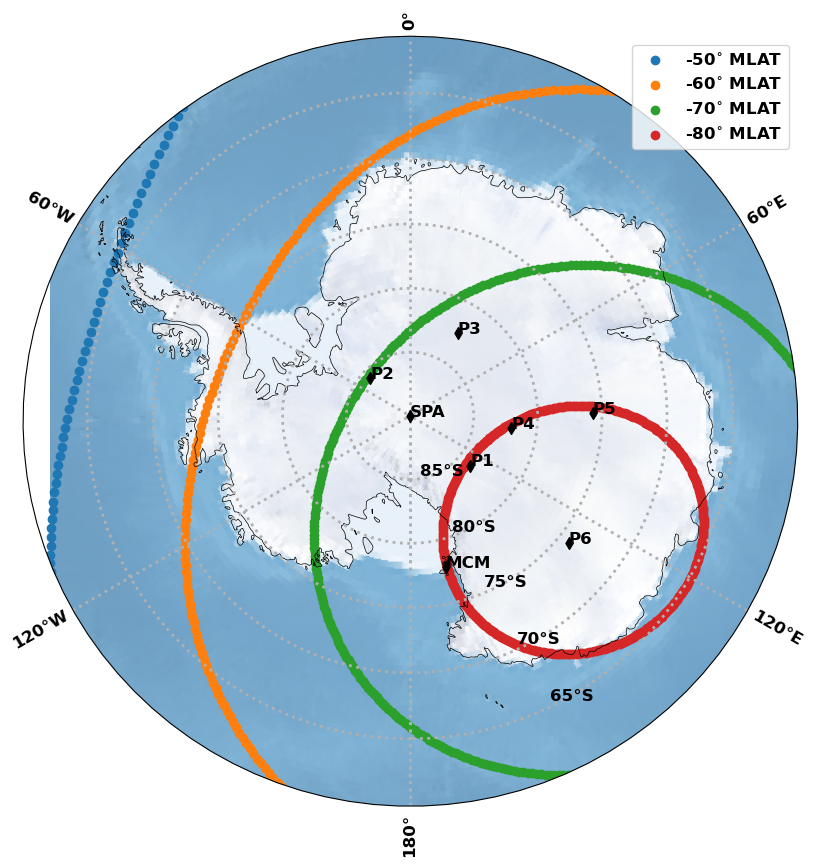

In [6]:
fig = plt.figure(figsize=[10, 10])

# We choose to plot in an Orthographic projection as it looks natural
# and the distortion is relatively small around the poles where
# the aurora is most likely.

# ax2 for Southern Hemisphere
ortho  = ccrs.SouthPolarStereo()
lonlat = ccrs.PlateCarree()
ax     = plt.subplot(1, 1, 1, projection=ortho)


for st,st_dct in stations.items():
    glat = st_dct.get('glat')
    glon = st_dct.get('glon')
    
    ax.scatter(glon,glat,transform=lonlat,zorder=100,color='k',marker='d')
    ax.text(glon,glat,st,transform=lonlat)
    

for mlat,mlat_dct in mlats_dct.items():
    glats = mlat_dct.get('glats')
    glons = mlat_dct.get('glons')
    
    lbl = '{!s}'.format(mlat)+'$^{\circ}$ MLAT'
    ax.scatter(glons,glats,transform=lonlat,label=lbl)

ax.legend(loc='upper right')
    
ax.stock_img()  #uncomment to get it plotted
ax.coastlines(lw=0.5, zorder=2)
ax.gridlines(lw=2, ec='black', draw_labels=True)

ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
add_circle_boundary(ax)


plt.show()